In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *

from sklearn.naive_bayes import *

In [2]:
d=pd.read_csv("Social_Network_Ads.csv")
df=pd.DataFrame(d)[["Gender","Age","EstimatedSalary","Purchased"]]
df.replace({"Gender":"Male"},0,inplace=True)
df.replace({"Gender":"Female"},1,inplace=True)
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [3]:
X=df[["Age","EstimatedSalary"]]
Y=df["Purchased"]

x1,x2,y1,y2=train_test_split(X,Y,train_size=0.7)

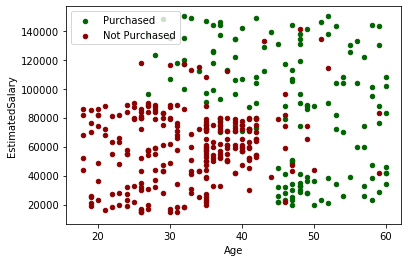

In [4]:
purchased=df[df["Purchased"]==1]
not_purchased=df[df["Purchased"]==0]
ax = purchased.plot.scatter(x="Age", y="EstimatedSalary", color="DarkGreen", label="Purchased")
not_purchased.plot.scatter(x="Age", y="EstimatedSalary", color="DarkRed", label="Not Purchased", ax=ax)

In [5]:
model = GaussianNB()
model.fit(x1, y1)
score1=model.score(x1,y1)
score2=model.score(x2,y2)
score=model.score(X,Y)
print(score,score1,score2)

0.8875 0.8928571428571429 0.875


In [6]:
y2_=model.predict(x2)
ny2=np.array(y2)
nx2=np.array(x2)
print("Age Est.Sal. P' P")
for i in range(len(ny2)):
    print(*nx2[i],y2_[i],ny2[i])

Age Est.Sal. P' P
36 63000 0 0
33 41000 0 0
37 77000 0 0
42 54000 0 0
39 106000 1 1
47 25000 1 1
48 30000 1 1
34 25000 0 0
27 20000 0 0
57 33000 1 1
38 71000 0 0
20 82000 0 0
39 73000 0 0
23 66000 0 0
52 138000 1 1
37 74000 0 0
45 131000 1 1
23 48000 0 0
60 42000 1 1
46 28000 1 1
39 42000 0 0
45 32000 0 1
48 33000 1 1
35 23000 0 0
32 117000 0 1
27 58000 0 0
46 74000 1 0
40 47000 0 0
28 123000 0 1
50 20000 1 1
45 26000 0 1
22 27000 0 0
38 80000 0 0
52 114000 1 0
19 70000 0 0
24 23000 0 0
52 38000 1 1
34 72000 0 0
26 80000 0 0
35 53000 0 0
35 75000 0 0
42 75000 0 0
56 133000 1 1
59 130000 1 1
26 80000 0 0
29 83000 0 0
46 96000 1 0
19 19000 0 0
40 71000 0 1
40 78000 0 0
36 75000 0 0
42 108000 1 1
35 97000 0 1
26 32000 0 0
25 80000 0 0
49 39000 1 1
32 86000 0 0
35 50000 0 0
35 91000 0 1
53 104000 1 1
25 87000 0 0
35 72000 0 0
30 62000 0 0
58 101000 1 1
35 27000 0 0
30 49000 0 0
35 77000 0 0
42 79000 0 0
42 70000 0 0
27 96000 0 1
46 23000 1 1
40 57000 0 0
38 71000 0 0
33 28000 0 0
31 18000 

In [7]:
cm = confusion_matrix(y_true=y2, y_pred=model.predict(x2))
cm[::-1, ::-1]

array([[30, 10],
       [ 5, 75]], dtype=int64)

c:\users\djdheeraj\pycharmprojects\westart\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


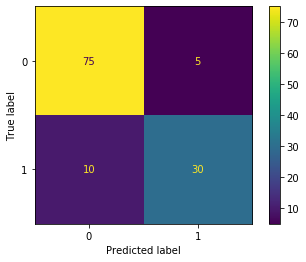

In [8]:
plot_confusion_matrix(model, x2,y2)

In [9]:
cm = confusion_matrix(y_true=y1, y_pred=model.predict(x1))
cm[::-1, ::-1]

array([[ 87,  16],
       [ 14, 163]], dtype=int64)

c:\users\djdheeraj\pycharmprojects\westart\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


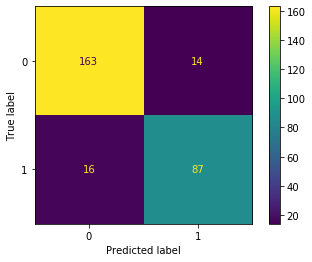

In [10]:
plot_confusion_matrix(model, x1,y1)

In [11]:
cm = confusion_matrix(y_true=Y, y_pred=model.predict(X))
cm[::-1, ::-1]

array([[117,  26],
       [ 19, 238]], dtype=int64)

c:\users\djdheeraj\pycharmprojects\westart\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


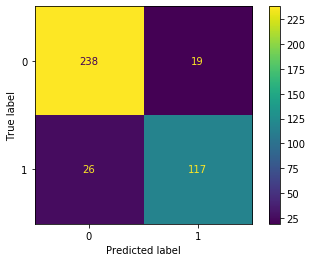

In [12]:
plot_confusion_matrix(model, X,Y)